### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Image enhancement algorithms using Morphological Operations**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

#### Mathematical Morphology
Tool for extracting image components that are useful in the representation and description of region shape [1].

There are morphological techniques for pre- or postprocessing images, such as morphological filtering, thinning, and prunning.

It is important to make mention that our inputs would be images and outputs images, whose outputs are **image attributes**, for tasks such as **object extraction** and **description**.

As we mention before, the Morphology is a tool that can help us in tasks suchs as:
* Image segmentation.
* Feature extraction.
* Object recognition.

that fom the foundation of techniques for extracting "meaning" from an image.


#### Binary Images
Two compoenntes of of each elements of the set refers to the coordinates of a pixel, and the third corresponds to is discret intensity value. Sets in higher dimensional spaces can contain other image attributes, such as color and time-varying components.

Morphological operations are defined in terms of sets.

Morphology is used with two types of sets of pixels:
* Objects: defined as sets of foreground pixels.
* Structuring elements (SE's): specified in terms of both foreground and background prixels, in SE we can have elements called "don't care" which it means that the elements doesn't matter, the value can be ignored, or it can be made to fit a desired value (Structuring elements are used in a form similar to spatial convolution kernels).

<img src="https://www.researchgate.net/profile/Thotreingam-Kasar/publication/228680780/figure/fig3/AS:669275350126607@1536579086384/The-foreground-and-the-background-pixels-of-each-edge-component.jpg" alt="Image Alt Text" width="250"/>


The concept of set reflection and translation are used extensively in morphology in connection with SE's.



In this lab we are going to focus in tools used for binary image morphology, including:
* Erosion.
* Dilation.
* Opening.
* Closinng.


with the used of these algorithms in binary image morphology, it can perfom task such as:
* Morphological smoothing.
* Edge detection.
* Extracting connected components.
* Skeletonizing.

It also can be applied algorithms for grayscale image processing for tasks such as:
* Textural segmentation.
* Granulometry.
* Computing gray-scale image gradients.






### Importing libraries

In [2]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [70]:
# Loading images
thrombosis_image = cv2.imread("data/thrombosis.jpg")
thrombosis_image = cv2.cvtColor(thrombosis_image,cv2.COLOR_BGR2GRAY)
pet_image = cv2.imread("data/pet_image.png")
pet_image = cv2.cvtColor(pet_image, cv2.COLOR_BGR2GRAY)

In [75]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks 
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots 
    plt.tight_layout()
    plt.show()


### 1. Application of Erosion in Image Processing
Morphological erosion removes floating pixels and thin lines so that only substantive objects remain. Remaining lines appear thinner and shapes appear smaller [2].

<img src="https://www.mathworks.com/help/images/morph_erode.png" width="250"/>

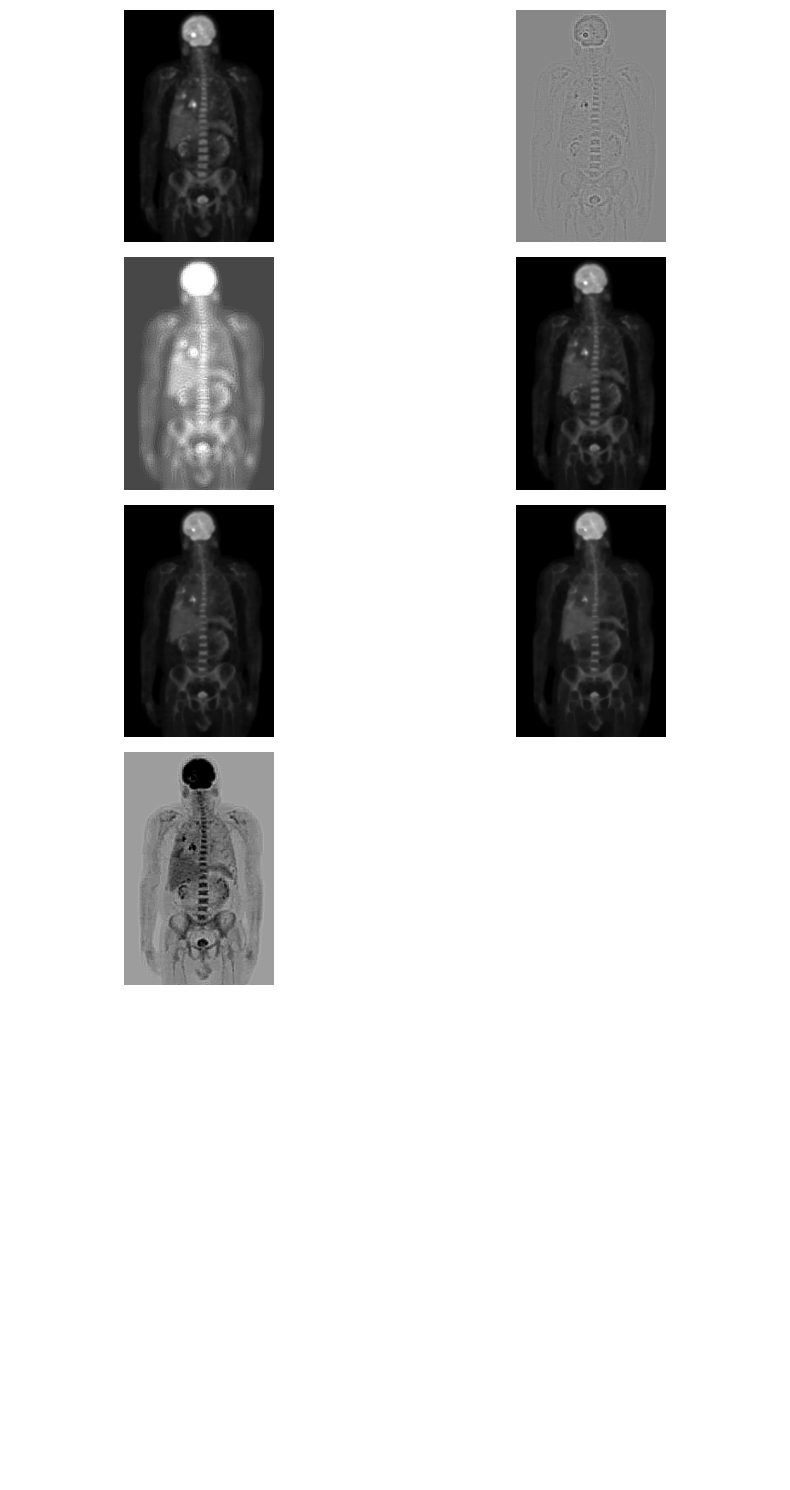

In [85]:


# gaussian blur

gaussian_image = cv2.GaussianBlur(pet_image,(3,3),0.1)

laplacian_image = cv2.Laplacian(gaussian_image, cv2.CV_64F, ksize=3)

# sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
# sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1, ksize=3)  


# sobel_image = np.sqrt(sobel_x**2 + sobel_y**2)
laplacian_image = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
laplacian_image = np.uint8(laplacian_image)

sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

shapened_image = cv2.add(pet_image, laplacian_image)
sharpened_image = cv2.filter2D(shapened_image, -1, sharpening_kernel)



ret, thr_image = cv2.threshold(pet_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



eroded_images = []

kernel = np.ones((3,3), np.uint8) 

for i in range(0,3):
    eroded = cv2.erode(pet_image.copy(), kernel=kernel, iterations=i+1)
    
    eroded_images.append(eroded)

result = cv2.subtract(laplacian_image, eroded_images[1])

plot_images([pet_image, laplacian_image, shapened_image] + eroded_images + [result], nrows=6, figsize=(8,15))

kernel = np.ones((3,3))

### 2. Application of Dilation in Image Processing

Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger [2].

<img src="https://www.mathworks.com/help/images/morph_dilate.png" width="250"/>

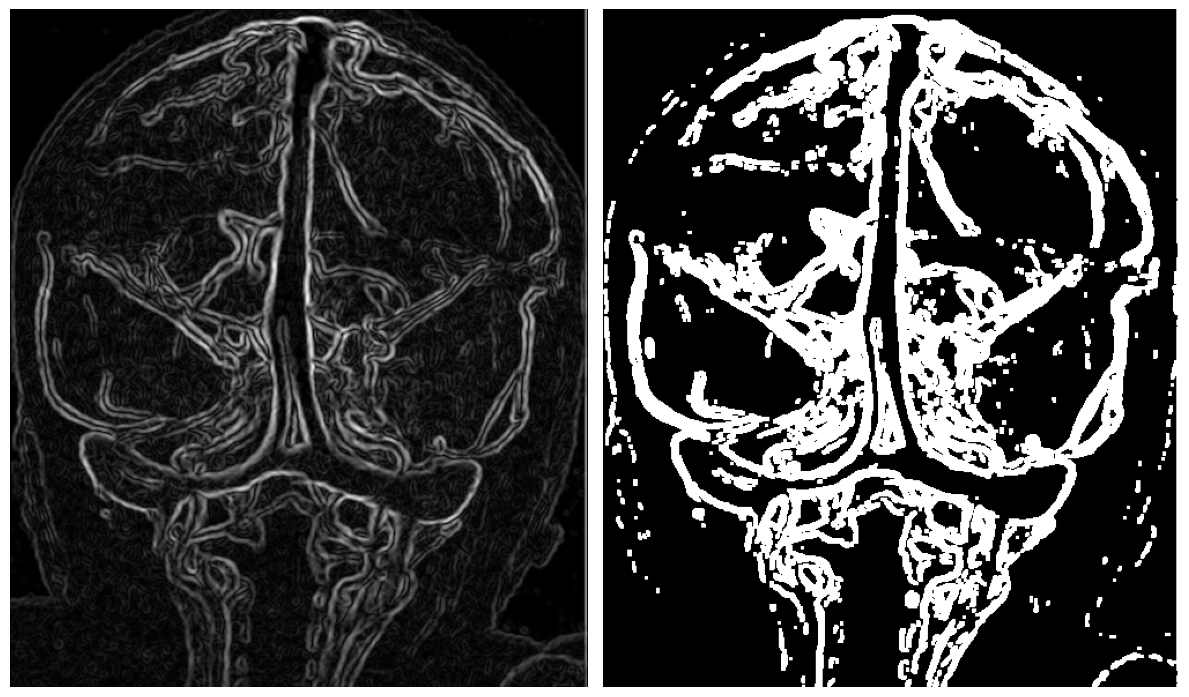

### 3.Application of Opening and Closing Image Processing

### Conclusion

### References

* [2] Anon. n.d. “Types of Morphological Operations.” Retrieved (https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html).